In [1]:
%pylab inline
import calin.simulation.vs_optics;
import calin.io.sql_transceiver;
import calin.math.hex_array;

Populating the interactive namespace from numpy and matplotlib


In [2]:
rng = calin.math.rng.RNG()

In [3]:
def dms(d,m,s):
    sign = 1
    if(d<0):
        sign = -1
        d = abs(d)
    return sign * (d + m/60.0 + s/3600.0)

In [4]:
mst = calin.ix.simulation.vs_optics.IsotropicDCArrayParameters()
mst.mutable_array_origin().set_latitude(dms(28, 45, 47.36))
mst.mutable_array_origin().set_longitude(dms(-17, 53, 23.93))
mst.mutable_array_origin().set_elevation(2178.0)
mst.mutable_prescribed_array_layout().add_scope_positions();
mst.mutable_reflector_frame().set_optic_axis_rotation(-90);
dc = mst.mutable_reflector()
dc.set_curvature_radius(1920)
dc.set_aperture(1230)
dc.set_facet_num_hex_rings(5)
dc.mutable_psf_align().set_object_plane(inf);
dc.set_facet_spacing(122)
dc.set_facet_size(120)
dc.set_facet_focal_length(1607)
dc.set_facet_spot_size_probability(0.8)
#dc.set_facet_labeling_parity(True)
dc.set_weathering_factor(1.0)
for id in [1,62,67,72,77,82,87]: dc.add_facet_missing_list(id-1)
mst.mutable_focal_plane().set_camera_diameter(235)
mst.mutable_focal_plane().mutable_translation().set_y(1600)
mst.mutable_pixel().set_spacing(5)
mst.mutable_pixel().set_cone_inner_diameter(5)
mst.mutable_pixel().set_cone_survival_prob(1)
mst.mutable_pixel().set_hex_module_size(1)
mst.mutable_pixel().set_module_num_hex_rings(9)
u1,v1 = calin.math.hex_array.cluster_hexid_to_center_uv(1,1)
x1,y1 = calin.math.hex_array.uv_to_xy(u1,v1)
rot = -arctan2(-y1,x1)/pi*180 + 30
mst.mutable_focal_plane().mutable_rotation().set_y(rot)

In [5]:
u1,v1,x1,y1

(2, 1, 2.5, 0.8660254037844386)

In [6]:
print(mst.DebugString())

array_origin {
  latitude: 28.763155555555556
  longitude: -17.889980555555557
  elevation: 2178
}
prescribed_array_layout {
  scope_positions {
  }
}
reflector_frame {
  optic_axis_rotation: -90
}
reflector {
  curvature_radius: 1920
  aperture: 1230
  psf_align {
    object_plane: inf
  }
  facet_num_hex_rings: 5
  facet_spacing: 122
  facet_size: 120
  facet_focal_length: 1607
  facet_spot_size_probability: 0.8
  facet_missing_list: 0
  facet_missing_list: 61
  facet_missing_list: 66
  facet_missing_list: 71
  facet_missing_list: 76
  facet_missing_list: 81
  facet_missing_list: 86
  weathering_factor: 1
}
focal_plane {
  camera_diameter: 235
  translation {
    y: 1600
  }
  rotation {
    y: 49.106605350869096
  }
}
pixel {
  spacing: 5
  cone_inner_diameter: 5
  cone_survival_prob: 1
  hex_module_size: 1
  module_num_hex_rings: 9
}



In [7]:
cta = calin.simulation.vs_optics.VSOArray()
cta.generateFromArrayParameters(mst, rng)

In [8]:
sql = calin.io.sql_transceiver.SQLite3Transceiver('/tmp/mst.sqlite',
        calin.io.sql_transceiver.SQLite3Transceiver.TRUNCATE_RW)
sql.create_tables_and_insert('array_parameters', mst)
sql.create_tables_and_insert('array', cta.dump_as_proto())
sql = None

In [9]:
scope = cta.telescope(0)

[-650, 650, -650, 650]

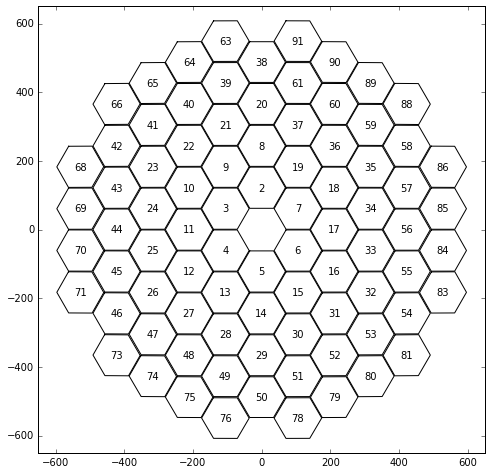

In [10]:
figure(figsize=(8,8))
for i in range(0,scope.numMirrors()):
    xc = scope.mirror(i).pos().x
    yc = scope.mirror(i).pos().z
    xe = []
    ye = []
    for j in [0,1,2,3,4,5,0]:
        v = scope.mirror(i).cornerInReflectorCoords(j,scope.facetSize())
        xe.append(v.x)
        ye.append(v.z)
    plot(xe,ye,'k')
    text(xc,yc,'%d'%(scope.mirror(i).hexID()+1),ha='center',va='center')
axis([-650,650,-650,650])

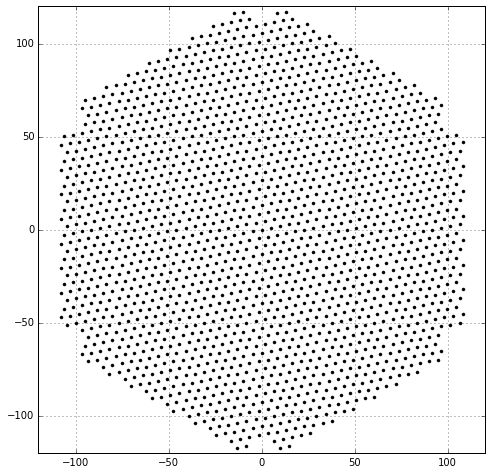

In [11]:
figure(figsize=(8,8))
for i in range(0,scope.numPixels()):
    v = calin.math.vs_physics.Vec3D(scope.pixel(i).pos())
#    scope.focalPlaneToReflector_mom(v)
    xc = v.x
    yc = v.z
    plot(xc,yc,'.k')
axis([-120, 120, -120, 120])
grid()
gcf().savefig('/tmp/nectarcam.pdf')

In [12]:
scope.numPixels()

1855

In [13]:
m=scope.mirror(0)
print(scope.dump_as_proto().DebugString())

pos {
}
alt_az {
}
translation {
}
curvature_radius: 1920
aperture: 1230
facet_spacing: 122
facet_size: 120
optic_axis_rotation: -90
hexagon_rings_n: 5
reflector_ip: 1262.121591698984
fp_translation {
  y: 1600
}
camera_diameter: 235
field_of_view: 8.4002382581348556
cathode_diameter: 5
pixel_spacing: 5
conc_survival_prob: 1
fp_rotation {
  y: 49.106605350869096
}
mirror {
  hex_id: 1
  pos {
    x: 7.4703454747988551e-15
    y: 3.8799620065553881
    z: 122
  }
  align {
    x: -2.3350500288391748e-18
    y: 0.99927262453440735
    z: -0.038134260922658307
  }
  focal_length: 1607
  degrading_factor: 1
}
mirror {
  id: 1
  hex_id: 2
  pos {
    x: -105.65509926170151
    y: 3.8799620065553881
    z: 61.000000000000007
  }
  align {
    x: 0.0330252387135663
    y: 0.99927262453440735
    z: -0.019067130461329157
  }
  focal_length: 1607
  degrading_factor: 1
}
mirror {
  id: 2
  hex_id: 3
  pos {
    x: -105.65509926170151
    y: 3.8799620065553881
    z: -60.999999999999993
  }
  ali

In [15]:
scope.pixelByHexID(1).hexID()

1